There was no assignment for week 1. However, as the course is thaugh in Octave instead of Pyton, let's use it as an opportunity to get familiar with https://www.scipy.org/. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats as st

### Learning about 'matrix' and linear algebra in Python

<div class="alert alert-block alert-warning">
<p><b>Dimension and shape</b></p> 
    While working with Python and Numpy, I've come accross lots of undesired effects due to the shape of my data.  Indeed, lot's of functions are influenced by those in Numpy. See for exemple, <a href="https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.matmul.html">matmul</a>. 
    In addition, printing the shape is of great help while debuging your algorithm!
</div>

In [2]:
a = np.arange(15).reshape(3, 5)
print(a)
print(a.shape)
print(type(a))
print(a.ndim)
print(a.dtype.name)
print(a[1,2])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
(3, 5)
<class 'numpy.ndarray'>
2
int32
7


In [3]:
b = np.arange( 10, 30, 5 )
c = np.arange( 10, 30, 5 )
d = b + c
e = 2 * c
f = np.transpose(b)
print(e - d)
print(d)
print(f)

[0 0 0 0]
[20 30 40 50]
[10 15 20 25]


In [4]:
a = np.arange(9).reshape((3, 3))
print(a)
print('a', a.shape) 
print('a', a.ndim) 

b = np.ones(3).reshape(3)
print(b)
print('b', b.shape)
print('b', b.ndim) 

c = np.arange(3).reshape(3)
print(c)
print('c', c.shape)
print('c', c.ndim) 

[[0 1 2]
 [3 4 5]
 [6 7 8]]
a (3, 3)
a 2
[1. 1. 1.]
b (3,)
b 1
[0 1 2]
c (3,)
c 1


### np.dot  
Dot product of two arrays.  
- If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).
- If both a and b are 2-D arrays, it is matrix multiplication, but using matmul or a @ b is preferred.
- If either a or b is 0-D (scalar), it is equivalent to multiply and using numpy.multiply(a, b) or a * b is preferred.

In [5]:
np.dot(2,1)

2

In [6]:
# (3,3) x (3,1) = (3,1)
print(np.dot(a, b.reshape(3,1)))
a.dot(b.reshape(3,1)) == np.dot(a, b.reshape(3,1)) 

[[ 3.]
 [12.]
 [21.]]


array([[ True],
       [ True],
       [ True]])

In [7]:
np.dot(a,2) - (a * 2)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

### np.matmul  
Matrix product of two arrays.  
- If both arguments are 2-D they are multiplied like conventional matrices.
- If the first argument is 1-D, it is promoted to a matrix by prepending a 1 to its dimensions. After matrix multiplication the prepended 1 is removed.
- If the second argument is 1-D, it is promoted to a matrix by appending a 1 to its dimensions. After matrix multiplication the appended 1 is removed.

In [8]:
print(a @ b.reshape((3,1)))
print(a @ b.reshape((3,1)) == np.matmul(a, b.reshape((3,1))))
a @ b.reshape((3,1)) == np.matmul(a, b)

[[ 3.]
 [12.]
 [21.]]
[[ True]
 [ True]
 [ True]]


array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

In [9]:
a @ b

array([ 3., 12., 21.])

### np.multiply
Multiply arguments element-wise

In [10]:
print(a * b)
a * b == np.multiply(a, b)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [11]:
a * c

array([[ 0,  1,  4],
       [ 0,  4, 10],
       [ 0,  7, 16]])

In [12]:
b * c

array([0., 1., 2.])

In [13]:
c * b

array([0., 1., 2.])

### Let's generate some data

In [14]:
num_observations = 100
mean = [0, 5]
cov = [[1, 0.9],
       [0.9, 1]]

x = np.random.multivariate_normal(mean, cov, num_observations)

y = x[:,0]
X = x[:,1]

In [15]:
print(y.ndim)
print(y.shape)
print(X.shape)

1
(100,)
(100,)


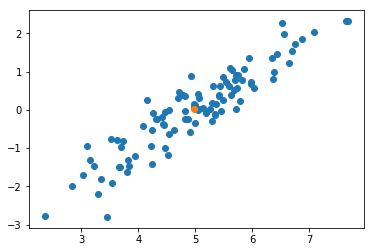

In [16]:
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.scatter(X.mean(), y.mean())
plt.show()

### Univariate linear regression

Let's try a **dirty** implementation of univariate linear regression.

In [17]:
def predict(theta0, theta1, X):
    return theta0 + theta1 * X

In [18]:
def loss(y, y_pred):
    return sum([data**2 for data in (y-y_pred)]) / (2*float(len(y)))

What happen if we predict always the mean?

In [19]:
print(loss(y,y.mean()))

0.5820145777515909


### Gradient descent (univariate)

In [20]:
def gradient_univariate_linear(X, y):
    theta0 = 0
    theta1 = 0
    learning_rate = 0.01
    max_iters = 10000
    
    m = float(len(y))
    
    cost = []
    
    for i in range(max_iters):
        y_pred = predict(theta0, theta1, X)
        
        # to keep track of the cost over the iterations
        cost.append(loss(y, y_pred))
        
        delta_theta0 = (1/m) * sum(y_pred - y)
        delta_theta1 = (1/m) * sum((y_pred - y)*X)
        
        theta0 = theta0 - learning_rate * delta_theta0
        theta1 = theta1 - learning_rate * delta_theta1
        
    return theta0, theta1, cost

In [21]:
theta0, theta1, cost  = gradient_univariate_linear(X, y)
y_pred = predict(theta0, theta1, X)

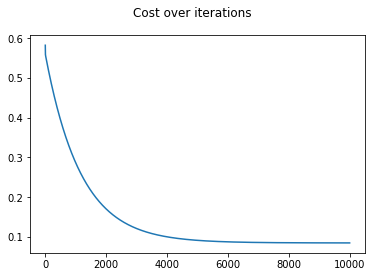

In [22]:
fig, ax = plt.subplots()
fig.suptitle('Cost over iterations')
ax.plot(range(10000), cost)
plt.show()

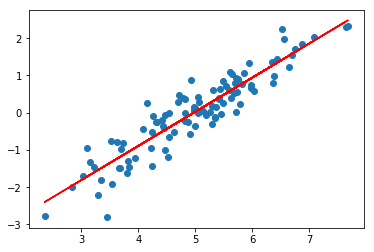

In [23]:
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, y_pred, color='red')
plt.show()

## Sklearn

Most of the algorithms presented during the course are already developed and optimised in https://scikit-learn.org/. I'll often use this library for error-checking.

In [24]:
reg = LinearRegression()

X_training_set = X.reshape(-1,1)
y_training_set = y.reshape(-1,1)

reg.fit(X_training_set, y_training_set)
reg.score(X_training_set, y_training_set)

# Coeficient
print('thetha0', reg.intercept_)
print('thetha1', reg.coef_)

# Have a look at R sq to give an idea of the fit 
print('R sq: ',reg.score(X_training_set,y_training_set))

# and so the correlation is..
print('Correlation: ', np.sqrt(reg.score(X_training_set, y_training_set)))

thetha0 [-4.61875186]
thetha1 [[0.92808116]]
R sq:  0.8555668272434659
Correlation:  0.9249685547322491


The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [25]:
R = 1 - (cost[-1]/loss(y,y.mean()))
print(R)

0.8554123057263698


Our results are in line with scikit :)